<h1>Final Project : Nasdaq Prediction by Naive Bayses Classifier and Network Analysis </h1>

<h3> DATA 620 Web Analytics, CUNY Spring 2018 </h3>


### Goal:
1. To use Naive Bayses classifier to predict the company in positive or negative direction by scraping News in Website of Nasdaq
2. To compare the prediction result by different dictionary (package definition of positive and negative, such as vaderSentiment and textblob)
3. To see whether news sentiment is associated with stock price movement by analyzing the time series data.
4. To use island method to create network graph for analysis

### Methodology:
- Use natural language processing function, like tokenize, NaiveBayesClassifier to provides efficient ways to analyze the scrapying news data from website of Nasdaq. To explore the positive and negative definition of investment directions based on the data about latest news from Nasdaq in the United States. 
- It shows empirical results by using machine learning method to represent information from Nasdaq's New, and simple naive Bayes classifiers to predict the direction of movements.

### Data source:
- The dataset is from scraping the latest news for the specific required stock shares or index. https://www.nasdaq.com 

- The first data for this application contains total 46 cases of positive and negative defintion from the web http://positivewordsresearch.com/sentiment-analysis-resources/#content and the second data contains total 3389 cases of positive and negative definition from Twitter ("Sentiment Analysis and Subjectivity." An chapter in Handbook of Natural Language Processing, Second Edition, (editors: N. Indurkhya and F. J. Damerau), 2010.)

- The dataset of stock close price is from scraping the the website of Nasdaq.

### Milestones:

1. To scrapy the latest news data for comparing the definition data of positive and negative.

2. To analyze the definition data of positive and negative from twitter.

3. To obtain the positive or negative trend from the latest news of specific index or stock shares by natural language processing function - classify.

4. To test the accurancy by different features and choose the best model. 

5. Calculate Score of document = count (pos.matches) – count (neg.matches). If the Score is 0 or more, we consider the document is positive or else, negative. Then compare the movement semetiment score and stock price.

### Part 1 - Sentiment Analysis

#### Preparing classifier to analyze the scrapying news
1. To input the 46 rows dictionary of positive and negative from dataframe to list data (First dictionary)
2. To use word_tokenize function to train the list data
3. To create the classifier by NaiveBayesClassifier function to built based on training corpora containing the correct label for each input.
4. To use show_most_informative_features function to see the ratio of occurences in negative to positive



In [3]:
from nltk.corpus import names as names_ntlk
import nltk
import pandas as pd
import matplotlib
import statistics
import scipy
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns

### Definition 1 of dictionary

In [4]:
# input the 46 rows dictionary of positive and negative
from pattern.en import ngrams

words=pd.read_csv("https://raw.githubusercontent.com/fung1091/data620/master/finalproject/dict.csv")
words=words.rename(columns = {'okay from USFDA':'word', 'positive':'direction'})

# Mixing the directio
words = words.sample(frac=1)
words.head()

,word,direction
0,more approvals,positive
3,resolution,positive
36,concerns,negative
34,slowdown,negative
37,drag on sales,negative


In [5]:
len(words)

46

In [6]:
# Create the list from dataframe
words1 = list(words.word)
words2 = list(words.direction)

words3 = list(zip(words1,words2))
#print words3

In [7]:
#Input dictionary as train dataset
train = words3
from nltk.tokenize import word_tokenize # or use some other tokenizer
all_words = set(word.lower() for passage in train for word in word_tokenize(passage[0]))
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'action': False,
   'adulterated': False,
   'affecting': False,
   'approval': False,
   'approvals': True,
   'better': False,
   'challenging': False,
   'concerns': False,
   'contaminated': False,
   'declined': False,
   'difficult': False,
   'drag': False,
   'drop': False,
   'dull': False,
   'erosion': False,
   'expected': False,
   'failed': False,
   'favourable': False,
   'growth': False,
   'health': False,
   'initiated': False,
   'issued': False,
   'legal': False,
   'letter': False,
   'lower': False,
   'margins': False,
   'more': True,
   'much': False,
   'on': False,
   'one': False,
   'positive': False,
   'potentially': False,
   'pressure': False,
   'price': False,
   'pricing': False,
   'recall': False,
   'reported': False,
   'resolution': False,
   'rupee': False,
   'sales': False,
   'sanctions': False,
   'significant': False,
   'slowdown': False,
   'stability': False,
   'stellar\xa0': False,
   'step': False,
   'successful': False,
   'th

In [8]:
# Create classifier as train dataset and show the dataset feature between positive and negative
import nltk
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                  better = False          negati : positi =      1.3 : 1.0
                   sales = False          positi : negati =      1.2 : 1.0
                    step = False          negati : positi =      1.1 : 1.0
              successful = False          negati : positi =      1.1 : 1.0
               stability = False          negati : positi =      1.1 : 1.0
                approval = False          negati : positi =      1.1 : 1.0
               initiated = False          negati : positi =      1.1 : 1.0
                   rupee = False          negati : positi =      1.1 : 1.0
                 margins = False          negati : positi =      1.1 : 1.0
                  health = False          negati : positi =      1.1 : 1.0


#### Scraping news data from https://www.nasdaq.com - Nasdaq

1. To scraping the latest news in order to get the investment incentive for each stock share or index for the prediction of short term price fluctuation purpose.
2. To use "Nasdaq" as a dictionary of companies to create list url
3. To use beautifulsoup function to check and list out the link of all related article in Nasdaq webpage

In [9]:
import csv
import time
import requests
from bs4 import BeautifulSoup
from pattern.en import ngrams

Base_url = "https://www.nasdaq.com"

# Build a dictionary of companies and their abbreviated names 
companies = {'ndaq':'ndaq'}
             
# Create a list of the news section urls of the respective companies 
url_list = ['https://www.nasdaq.com/symbol/{}/news-headlines'.format(k,v) for k,v in companies.iteritems()]
print url_list


['https://www.nasdaq.com/symbol/ndaq/news-headlines']


In [10]:
# list out the link of all related article in Nasdaq webpage
import re
List_of_links = [] 

for urls in url_list:
   html = requests.get(urls)
   soup = BeautifulSoup(html.text,'html.parser')

for link2 in soup.find_all(href=re.compile("nasdaq.com/article")):
    link3 = link2.get('href')
    #unique_links = list(set(link2.get('href')))
    List_of_links.append(link3)


To show all recent Nasdaq articles links for scraping text again.

In [11]:
# Remove the duplicate news articles based on News Title
unique_links = list(set(List_of_links))
for q in unique_links: print q


https://www.nasdaq.com/article/seeking-belt-buckle-role-kazakhstan-launches-chinabacked-financial-hub-20180705-00657
https://www.nasdaq.com/article/nasdaq-ndaq-posts-mixed-q2-volumes-revenues-per-contract-cm989247
https://www.nasdaq.com/article/iex-hires-former-ise-executive-ilyevsky-to-lead-market-development-20180709-01098
https://www.nasdaq.com/article/marketaxess-mktx-gains-on-top-line-growth-high-costs-hurt-cm990279
https://www.nasdaq.com/article/10-top-nasdaq-stocks-to-buy-now-cm991379
https://www.nasdaq.com/article/foreign-investors-losing-interest-in-the-us-cm992152
https://www.nasdaq.com/article/ny-jury-convicts-two-men-for-trading-on-hacked-press-releases-20180706-00555
https://www.nasdaq.com/article/10-lowpaying-jobs-that-will-actually-pay-off-in-retirement-cm992157
https://www.nasdaq.com/article/uk-shifts-brexit-focus-for-financial-services-sector-ft-20180711-01049


In [13]:
# Scrape the text details from each article
import urllib

for selected_links in unique_links:
   results_url = selected_links 
   results = urllib.urlopen(results_url).read()
   results_text = BeautifulSoup(results)
   extract_text = results_text.find(id='articlebody')
   #print extract_text
   final_text = extract_text.get_text()
   print final_text[:50]

C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Reuters

@media screen and (max-device-width: 4


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo


  Nasdaq, Inc. NDAQ  has r


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo

@media screen and (max-devi


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo


makeZacksArticleAd();Marke


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo


Not all that long ago, a N


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo


American companies saw a w


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo

@media screen and (max-devi


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Shutterstock photo


Benefits are one of the ke


C:\Users\jim\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\jim\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))





Reuters

@media screen and (max-device-width: 4


#### Test sentence

1. To use the classify function by First dictionary classifier to test the scraping news from Nasdaq webpage
2. To check the prediction result - positive or negative

In [14]:
test_sentence = final_text
test_sent_features = {word3.lower(): (word3 in word_tokenize(test_sentence.lower())) for word3 in all_words}
classifier.classify(test_sent_features)

C:\Users\jim\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


'negative'

#### Result
According to the sentiment analysis for Nasdaq's News, the number of positive words is more than number of negative words, it may relate to increase the comparative investing incentive for the product of Nasdaq's index.

### Definition 2 of dictionary

- Second dataset contains total 3389 cases of positive and negative definition from Twitter
- To compare the prediction result with dataset of definition 1 if we can get the same result from larger dataset dictionary
- Theoretically the larger number of dataset should obtain more accurancy prediction result, but we found that general computer would be overloading to scrape huge number of dataset, transform into word pieces and test.


In [15]:
from pattern.en import ngrams

words4=pd.read_csv("https://raw.githubusercontent.com/fung1091/data620/master/finalproject/dict1.csv")

# mixing the dataset for different ranking of direction
words4 = words4.sample(frac=0.5)
words4.head()

,word,direction
3926,snobby,negative
3114,oppress,negative
6018,overtaken,positive
4781,acclaim,positive
5386,excallent,positive


In [16]:
len(words4)

3389

In [17]:
# Create the list from dataframe
words5 = list(words4.word)
words6 = list(words4.direction)

words7 = list(zip(words5,words6))
#print words3

### Test sentence 2 - use twitter pos / neg 's dictionary

In [22]:
test_sentence = final_text
test_sent_features = {words4.lower(): (words4 in word_tokenize(test_sentence.lower())) for words4 in all_words}
classifier.classify(test_sent_features)

C:\Users\jim\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


'negative'

### Result for sentiment analysis
We got the same result between twitter positie / negative dictionary and 46 rows dictionary, of course more words dictionary will get the higher accuarcy result for analysis, but it is necessary for more computer processing time. So from this learning research, we will choose less lows dictionary for the following Networkx analysis to compare the different stocks share.

### Part 2 - Networkx from sentiment analysis result

We are further checking the direction of stock shares or index to find out any opportunity of investment, like buy stocks in positive intention or sold stocks in negative intention.

General computer need to operate each stock share more than 5 minutes, so we are now operating only 3 stock sentiment analysis here. Around 15 minutes waiting for processing, if it operate in real, we need a more high efficient processor and computer to do it. (Nasdaq will block the access IP if over accessing information)

1. Scraping news from Nasdaq for specific stocks ticker symbol
2. Using beautifulsoup to loop required stocks or index, and use word_tokenize function to get the text instead of using get_text() in beautifulsoup to avoid error scraping for sentiment analysis
3. Testing the sentence with dictionary (Use 46 rows dictionary, because more words need more time in processing)
4. Getting the result - positive or negative trend from each stocks share
5. Generating the dataframe to create networkx connection graph

In [27]:
import re
import urllib
from nltk import word_tokenize
import itertools
import numpy as np
import pandas as pd

List_of_links = [] 

companies = {'ndaq':'ndaq', 'aapl':'aapl', 'cost':'cost'}

# Define column names
colNames = ('stocks','direction')

# Define a dataframe with the required column names
masterDF = pd.DataFrame(columns = colNames)

# A list of the group names
names = list(companies)

# Create a dataframe for each group
for i in names:
    tempDF = pd.DataFrame(columns = colNames)

    # Create a list of the news section urls of the respective companies 
    url_list = ['https://www.nasdaq.com/symbol/{}/news-headlines'.format(i)]
    
    for urls in url_list:
        html = requests.get(urls)
        soup = BeautifulSoup(html.text,'html.parser')

    for link2 in soup.find_all(href=re.compile("nasdaq.com/article")):
        link3 = link2.get('href')
        #unique_links = list(set(link2.get('href')))
        List_of_links.append(link3)
        
        # Remove the duplicate news articles based on News Title
        unique_links = list(set(List_of_links))
        #for q in unique_links: print q

    for selected_links in unique_links:
        results_url = selected_links 
        results = urllib.urlopen(results_url).read()
        results_text = BeautifulSoup(results).get_text()
    
        tokens = word_tokenize(results_text)
        words = [w for w in tokens if w.isalpha()]
        words = [w.lower() for w in words]
    
        # unlist of word in sentence
        final_text  = " ".join(str(x) for x in words).encode('utf-8')
        #print final_text

    # Test words sentence with dictionary to get positive or negative result
    test_sentence = final_text
    test_sent_features = {word3.lower(): (word3 in word_tokenize(test_sentence.lower())) for word3 in all_words}
    m = classifier.classify(test_sent_features)
    
    # Enter the result in dataframe
    tempDF['direction'] = [m]
    tempDF['stocks'] = i

    # Try to append temporary DF to master DF
    masterDF = masterDF.append(tempDF,ignore_index=True)

print(masterDF)


  stocks direction
0   aapl  negative
1   cost  negative
2   ndaq  negative


#### Limitation of Nasdaq accessing information 

We found the limitation of over accessing information from Nasdaq, IP will be blocked by Nasdaq for cyber security. So we decide to use the CSV instead of every stock shares scraping from Nasdaq in this project learning.

#### Data
There are 892 total records of stocks. The records of direction and price are based on 16th July 2018, so the trend and weight will be changed every transaction date.

#### Features

- stock
- direction
- price for lastsale

In [28]:
stockpred = pd.read_csv("https://raw.githubusercontent.com/data620team3/data620team3/master/finalproject/stock.csv")

stockpred.head()

,stock,direction,LastSale
0,PIH,positive,7.2000
1,PIHPP,positive,25.5000
2,TURN,positive,2.1675
3,FLWS,negative,12.8000
4,FCCY,negative,21.4500


In [29]:
len (stockpred)

892

#### Networkx Graph
We will use stock as one set of nodes and direction as the other. This should lead us to a bipartite graph.

In addition, there is a weight associated with every edge. The weight represents the lastsale price of stock to create multiple islands.

In [52]:
# Networkx graph with two sets of bipartite nodes
B = nx.Graph()
B.add_nodes_from(stockpred['stock'], bipartite=0)
B.add_nodes_from(stockpred['direction'], bipartite=1)

# Extract data from the main dataframe and add as weighted edges
weighted_edges = stockpred[['stock', 'direction','LastSale']].T.apply(tuple).tolist()
B.add_weighted_edges_from(weighted_edges)


In [53]:
# Capture Biggest connected graph and test
B = max(nx.connected_component_subgraphs(B), key=len)
nx.is_connected(B)


True

In [54]:
stock_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
direction_nodes = set(B) - stock_nodes


#### Island method

In [55]:
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
            
    return g2

In [56]:
def island_method(g, iterations=6):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [57]:
cc = sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)[0]
#    sorted(nx.connected_component_subgraphs(team_win), key = len, reverse=True)[0]
islands = island_method(cc)
 
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), len(sorted(nx.connected_component_subgraphs(i[1]), key = len, reverse=True)))

(0, 521, 1)
(303, 11, 1)
(606, 3, 1)
(909, 3, 1)
(1212, 2, 1)
(1515, 2, 1)
(1818, 2, 1)


It has 7 iterations on the biggest connected graph from the entire dataset. Although it is only positive and negative of direction nodes, but it is a good way to show the edge weight by lastsale price. 

The first one will visualize the most important and highest island with one positive direction with 521 stock shares.


### Visualization

Most of stock nodes are placed on first largest island with total 521 nodes with positive direction. 

Green color is stock, Orange color is direction - positive. 


### First Island Visualization
For the weight of all range stock price, it has 521 stock shares with one positive direction.

In [86]:
# Create a list of colors based on the node name

node_colors = []
for n in islands[0][1].nodes(data=True):
    if n[0] in stock_nodes:
        node_colors.append('#bf8a40')
    else:
        node_colors.append('#40bf80')


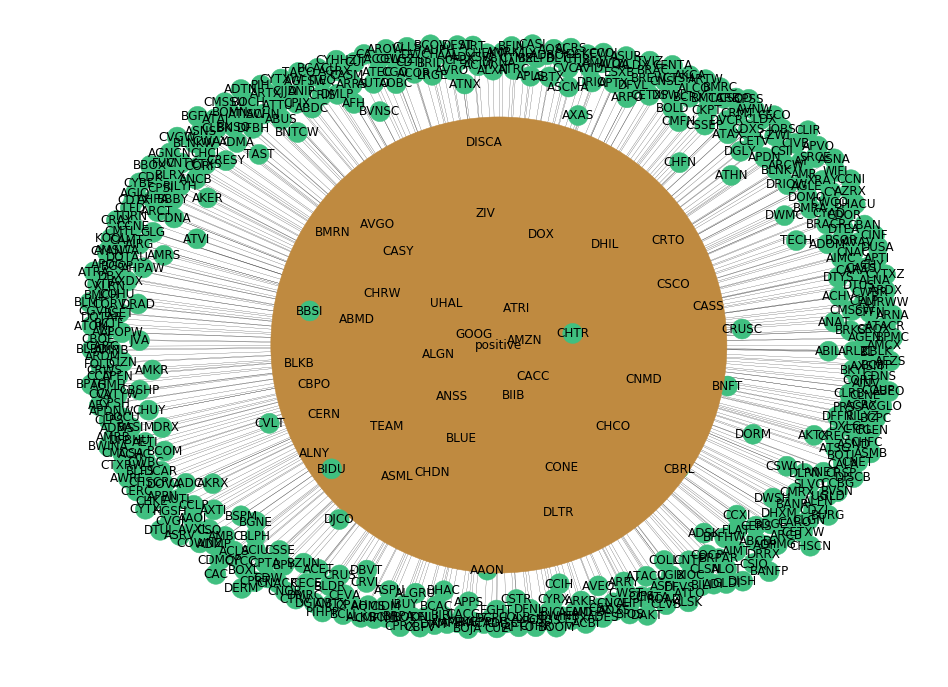

In [87]:
plt.rcParams['figure.figsize'] = [16, 12]

pos = nx.spring_layout(islands[0][1], k=2) # k=2 values helps spread the nodes

# Degree calculations to denote the size of nodes
degree = dict(nx.degree(islands[0][1]))


degree_graph = nx.draw_networkx(islands[0][1], 
                                pos=pos,
                                node_color=node_colors,
                                node_size=np.multiply(list(degree.values()), 400), # multiply degree by 400 for better resolution
                                with_labels=True, 
                                width=0.2)

# Remove axis
limits=plt.axis('off')

### Second Island Visualization
For the weight of stock price more than 303, it has 11 stock shares with one positive direction.

In [88]:
# Create a list of colors based on the node name

node_colors = []
for n in islands[1][1].nodes(data=True):
    if n[0] in stock_nodes:
        node_colors.append('#bf8a40')
    else:
        node_colors.append('#40bf80')

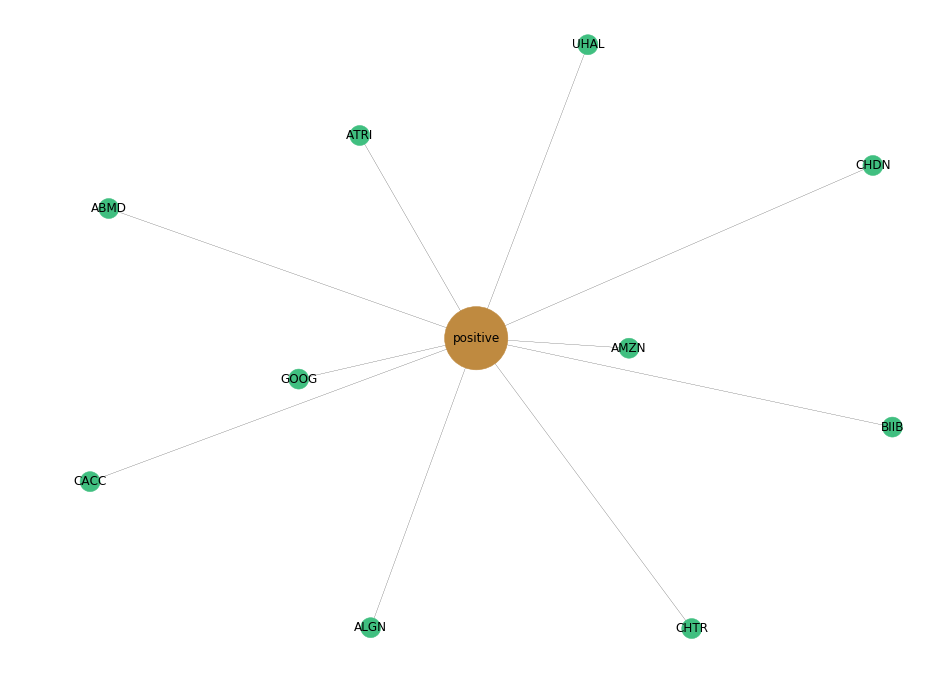

In [89]:
plt.rcParams['figure.figsize'] = [16, 12]

pos = nx.spring_layout(islands[1][1], k=2) # k=2 values helps spread the nodes

# Degree calculations to denote the size of nodes
degree = dict(nx.degree(islands[1][1]))


degree_graph = nx.draw_networkx(islands[1][1], 
                                pos=pos,
                                node_color=node_colors,
                                node_size=np.multiply(list(degree.values()), 400), # multiply degree by 400 for better resolution
                                with_labels=True, 
                                width=0.2)

# Remove axis
limits=plt.axis('off')

For the second island visualization, it has 10 stock shares nodes with one positive direction node, and the closeness nodes with central positive node show the weight of price value, like amazon and google are highest value of price comparing with all selected stocks.

## Conclusion
For sentiment analysis, more number of words dictionary will get more accurancy result for analsis, but it requires longer processing time to operate scraping, words cleaning, tokenizing and testing for large number amount of words, like we need 5 mins to operate each stock share. The example index, like nasdaq, the sentiment test result is negative on 17th July 2018, it may reflect the downward of investment incentive and may affect the price of index. 

For network analysis, we use the result of sentiment dataset to create the weighted network, according to the weight and positive direction, we can make our investing decision for the price weighting, like closeness central nodes, we need higher investment cost like google and amazon. We should choose the positive direction of stock shares with proper price for our investiment. 
 

## Furture improvement
1. We can check the accuracy of prediction with the price movement, like positive test result with price increasing.
2. We can increase the accuracy of prediction by increasing the number of defintion dictionary.
3. To use high processing computer to operate the classify the large number of words.
4. We should find the other website for scraping information, Nasdaq will block the IP if over accessing, it is not a stable website for research analysis.

## Reference:
1. https://www.nasdaq.com
2. http://positivewordsresearch.com/sentiment-analysis-resources/#content